# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Открыть файл с данными и изучить общую информацию. 

In [4]:
import pandas as pd
data=pd.read_csv('real_estate_data.csv',sep=',',decimal='.')
pd.set_option('display.max_columns', 50) # все столбца показываем
data.head()


,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

### Вывод

 - Данные состоят из 22 столбцов:
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении
    
- Всего строк 23699

- При выгрузке csv файла в Data Frame данные склеились в одну строку "\t". Разделил их, указав на сепаратор "\t"
- В данных есть пропущенные значения в столбцах:
    
      ceiling_height          14504 non-null object
      floors_total            23613 non-null object
      living_area             21796 non-null object
      is_apartment            2775 non-null object
    kitchen_area            21421 non-null object
      balcony                 12180 non-null object
      locality_name           23650 non-null object
      airports_nearest        18157 non-null object
      cityCenters_nearest     18180 non-null object
      parks_around3000        18181 non-null object
      parks_nearest           8079 non-null object
      ponds_around3000        18181 non-null object
      ponds_nearest           9110 non-null object
      days_exposition         20518 non-null object

- Присутствуют столбцы тип данных которых надо менять на другой тип:
    balcony — число балконов I ->int 
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)-> int
    first_day_exposition — дата публикации -> date
    floors_total — всего этажей в доме ->int
    is_apartment — апартаменты (булев тип) -> bool
    parks_around3000 — число парков в радиусе 3 км ->int
    ponds_around3000 — число водоёмов в радиусе 3 км ->int

 

### Шаг 2. Предобработка данных

In [6]:
data.dropna(subset=['locality_name'],inplace=True) #Удаляем nan в locality_name
data['locality_name'].isna().sum()

0

In [7]:
data['ceiling_height'].isna().sum() # сумма  nan в ceiling_height

9160

Средняя высота и медианная почти не отличаются. Для заполение пустых можно принять любую из них

In [8]:
data['ceiling_height']=data['ceiling_height'].astype('float64')# перевели в вещественный тип
#mean_height=data.groupby('locality_name')['ceiling_height'].transform('mean') # сгруппировали высоту потолков в зависимости от района
median_height=data['ceiling_height'].median()
data['ceiling_height'].fillna(median_height,inplace=True)
# записали в пустые места высоты потолка средние значения высот потолков по району
#data['ceiling_height'].mean() #средняя высота потолка из всей выборки

In [9]:
data['ceiling_height'].isna().sum() # сумма  nan в ceiling_height

0

Средняя высота и медианная почти не отличаются. Для заполение артифактов можно принять любую из них

In [10]:
data['living_area']=data['living_area'].astype('float64')  #меняем тип данных на вещественный для living_area и last_price
data['last_price']=data['last_price'].astype('float64')

In [11]:
data['price_for_m2']=data['last_price']/data['living_area']# Посчитали и сделали столбец со стоимостью за м2
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000


In [12]:
grouped_price=data.groupby('locality_name')['price_for_m2'].transform('mean') # группируем по району
nan=data.groupby('locality_name')['price_for_m2'].mean()
nan.sort_values()

locality_name
деревня Малая Романовка    14808.362369
деревня Старополье         14851.485149
деревня Выскатка           18856.907895
поселок Тёсово-4           20833.333333
поселок Совхозный          22600.000000
                               ...     
поселок Севастьяново                NaN
поселок станции Лужайка             NaN
посёлок Левашово                    NaN
посёлок Петро-Славянка              NaN
посёлок Плоское                     NaN
Name: price_for_m2, Length: 364, dtype: float64

In [13]:
grouped_price.isna().sum()


17

In [14]:
data['price_for_m2'].fillna(grouped_price,inplace=True)# Заполняем пропуски медианным значением стоимости 1 м.кв в зависимости от района

In [15]:
data.dropna(subset=['price_for_m2'],inplace=True) # удаляем если остались  nan
data['price_for_m2'].isna().sum()

0

In [16]:
data['living_area'].isna().sum()

1881

In [17]:
data['living_area'].fillna(data['last_price']/data['price_for_m2'],inplace=True) # заполняем пропуски площади поделив цену кв на стоимость 1 м.кв.

In [18]:
data['living_area'].isna().sum()

0

In [19]:
data['balcony'].isnull().sum()

11498

In [20]:
data['balcony']=data['balcony'].fillna(0) # заполняем пропуски балкона 0- нет балкона
data['balcony']=data['balcony'].astype('float64')
data['balcony']=data['balcony'].astype('int64')

In [21]:
data['balcony'].isnull().sum()

0

In [22]:
data['is_apartment'].isnull().sum()

20874

In [23]:
data['is_apartment']=data['is_apartment'].astype('bool') # переводим в бул

In [24]:
data['is_apartment']=data['is_apartment'].fillna(0) #заполняем 0-не аппартамент


In [25]:
data['is_apartment'].isnull().sum()

0

In [26]:
data['airports_nearest']=data['airports_nearest'].astype('float64')
grouped_airpots_nearest=data.groupby('locality_name')['airports_nearest'].transform('mean') 
data['airports_nearest'].isnull().sum()

5519

In [27]:
data['airports_nearest'].fillna(grouped_airpots_nearest,inplace=True)#заполняем пропуски расстояния до аэропорта по среднемму значению расстояния в зависимости от района.

In [28]:
data['airports_nearest'].isnull().sum()

5371

In [29]:
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].mean()) #где остались пропуски расстояния до аэропорта  заполняем просто по среднемму значению расстояния 

In [30]:
data['airports_nearest'].isnull().sum()

0

In [31]:
data['cityCenters_nearest']=data['cityCenters_nearest'].astype('float64')

In [32]:
data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'),inplace=True)

In [33]:
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())#заполняем пропуски расстояния до центра по среднемму значению расстояния в зависимости от района.

In [34]:
data['cityCenters_nearest'].isnull().sum()

0

In [35]:
data['parks_around3000']=data['parks_around3000'].astype('float64')
data['parks_around3000']=data['parks_around3000'].fillna(data['parks_around3000'].mean())#заполняем средним

In [36]:
data['parks_around3000']=data['parks_around3000'].astype('int64')

In [37]:
data['parks_nearest']=data['parks_nearest'].astype('float64')
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].mean())#заполняем средним

In [38]:
data['ponds_around3000']=data['ponds_around3000'].astype('float64')
data['ponds_around3000']=data['ponds_around3000'].fillna(data['ponds_around3000'].mean())#заполняем средним

In [39]:
data['ponds_around3000']=data['ponds_around3000'].astype('int64')

In [40]:
data['ponds_nearest']=data['ponds_nearest'].astype('float64')

In [41]:
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].mean())#заполняем средним

In [42]:
data['ponds_nearest'].isnull().sum()

0

In [43]:
data['floors_total']=data['floors_total'].astype('float64')

In [44]:
data['floors_total']=data.fillna(data['floors_total'].mean())#заполняем средним

In [45]:
data['floors_total']=data['floors_total'].astype('int64')

In [46]:
data['floors_total'].isnull().sum()

0

In [47]:
data['days_exposition']=data['days_exposition'].astype('float64')
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition']=data['days_exposition'].astype('int64')

In [48]:
data['kitchen_area']=data['kitchen_area'].astype('float64')

In [49]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())#заполняем средним

In [50]:
data['total_area']=data['total_area'].astype('float64')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23633 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23633 non-null  int64  
 1   total_images          23633 non-null  int64  
 2   last_price            23633 non-null  float64
 3   total_area            23633 non-null  float64
 4   first_day_exposition  23633 non-null  object 
 5   rooms                 23633 non-null  int64  
 6   ceiling_height        23633 non-null  float64
 7   floors_total          23633 non-null  int64  
 8   living_area           23633 non-null  float64
 9   floor                 23633 non-null  int64  
 10  is_apartment          23633 non-null  bool   
 11  studio                23633 non-null  bool   
 12  open_plan             23633 non-null  bool   
 13  kitchen_area          23633 non-null  float64
 14  balcony               23633 non-null  int64  
 15  locality_name      

Пропуски заполнены. В таблице осталось 23548 строк из 23699. Всего удалили 151 строк и один столбец, который не учавствует в анализе. Типы данных переведины в верные.

### Шаг 3. Посчет и добавление в таблицу

In [52]:
# Функция категоризации этажей
def floor_group(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый этаж'
    if what_floor==total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

In [53]:
floor_position=data.apply(floor_group,axis=1) #заливка дата сета через apply и функцию

In [54]:
data['Floor_position']=floor_position # новый столбец

In [55]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')#перевожу в формат даты
data['first_day_exposition']=data['first_day_exposition'].dt.round('1D') # округляю до дня
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,0,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,1,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,2,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,3,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,4,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж


In [56]:
data['week_day']=data['first_day_exposition'].dt.weekday #создаю столбец с днем недели

In [57]:
data['month']=data['first_day_exposition'].dt.month #создаю столбец с месяцем

In [58]:
data['year']=data['first_day_exposition'].dt.year #создаю столбец с годом

In [59]:
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,0,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж,3,3,2019
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,1,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж,1,12,2018
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,2,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж,3,8,2015
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,3,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж,4,7,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,4,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018


In [60]:
data['living_area/total_area']=data['living_area']/data['total_area'] #  отношение  жилой к общей площади
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,0,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж,3,3,2019,0.472222
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,1,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж,1,12,2018,0.460396
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,2,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж,3,8,2015,0.612500
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,3,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж,4,7,2015,1.898083
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,4,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018,0.320000


In [61]:
data['kitchen_area/living_area']=data['kitchen_area']/data['living_area'] #отношение площади кухни к жилой площади
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,0,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж,3,3,2019,0.472222,0.490196
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,1,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж,1,12,2018,0.460396,0.591398
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,2,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж,3,8,2015,0.612500,0.241983
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,3,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж,4,7,2015,1.898083,0.030153
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,4,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018,0.320000,1.281250


### Шаг 4. Исследовательский анализ данных:

In [62]:
import matplotlib.pyplot as plt # импорт библиотеки для графиков

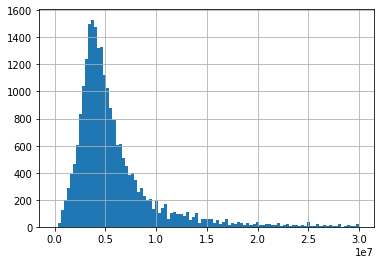

In [63]:
data['last_price'].hist(bins=100,range=(0,30000000))

Из гистораммы видно, что больше всего квартир продается за 3-4 млн. руб

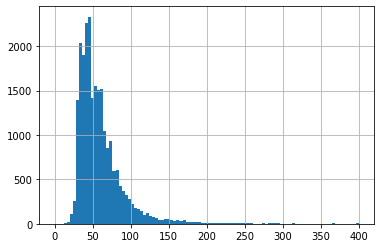

In [64]:
data['total_area'].hist(bins=100,range=(0,400))

Больше всего продается квартир площадью 45-49 м.кв

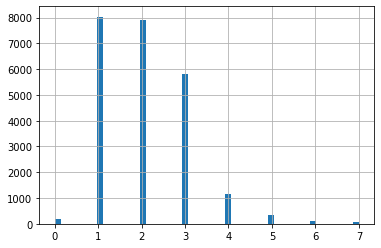

In [65]:
data['rooms'].hist(bins=50,range=(0,7))

Больше всего продается 1,2 комнатных квартир 

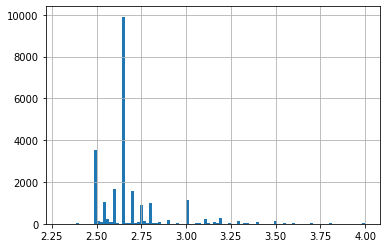

In [66]:
data['ceiling_height'].hist(bins=100,range=(2.3,4))

Больше всего продаж квартир с высотой потока 2.6 м

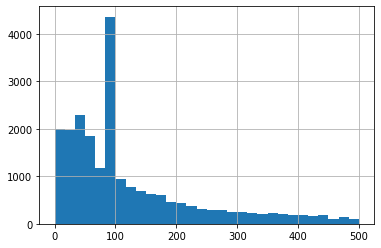

In [67]:
data['days_exposition'].hist(bins=30,range=(0,500))

Больше всего продаж квартир на 95 день

In [68]:
data['days_exposition'].describe() #Исследуем data

count    23633.000000
mean       169.237930
std        206.516127
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

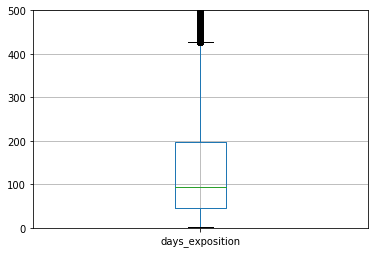

In [69]:
plt.ylim(0,500)
data.boxplot(column='days_exposition') 
plt.show()

Исследуя гистограмму продаж и диаграмму размаха можно видеть, что среднее время продажи квартиры 95 дней. Большая часть значений лежит за диапазоном 420 дней (1.5 межквартального размаха, добавленного к третьему квартилю). Это выглядит правдоподобным. Самыми быстрыми продажами можно назвать продажу в один день. Самой долгой продажей (если не брать во внимание выбросы, которые лежат за 1.5 межквартального размаха, добавленного в третьей квартилии)-427 дней. 

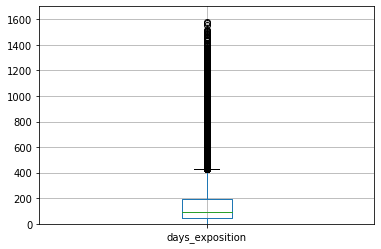

In [70]:
plt.ylim(0,1700)
data.boxplot(column='days_exposition')
plt.show()

Посторил диаграмму размаха со всеми выбросами 

In [71]:
data.sort_values(by='days_exposition',ascending=False).head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area
18843,18843,11,3500000.0,48.20,2014-12-15,2,2.50,18843,27.40,2,True,False,False,7.70,3,деревня Новое Девяткино,28878.607504,14234.907335,0,490.830729,0,518.043923,1580,127737.226277,Другой этаж,0,12,2014,0.568465,0.281022
1109,1109,1,34878556.0,95.80,2014-12-09,2,2.65,1109,58.30,5,True,False,False,20.00,1,Санкт-Петербург,21860.000000,318.000000,2,160.000000,3,569.000000,1572,598259.965695,Другой этаж,1,12,2014,0.608559,0.343053
9553,9553,11,10600000.0,80.00,2014-12-09,3,2.85,9553,44.00,9,True,False,False,15.00,0,Санкт-Петербург,17101.000000,17110.000000,0,490.830729,0,518.043923,1553,240909.090909,Другой этаж,1,12,2014,0.550000,0.340909
1885,1885,2,13300000.0,79.60,2014-12-09,2,3.00,1885,42.70,7,True,False,False,18.00,0,Санкт-Петербург,39393.000000,11096.000000,1,537.000000,0,518.043923,1513,311475.409836,Другой этаж,1,12,2014,0.536432,0.421546
6691,6691,3,4400000.0,42.98,2014-12-12,1,2.65,6691,18.72,1,True,False,False,11.31,0,Пушкин,19715.000000,30358.000000,1,439.000000,3,232.000000,1512,235042.735043,Первый этаж,4,12,2014,0.435551,0.604167


In [72]:
current_days_exposition_date=data.query('days_exposition<420')# Убрали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3

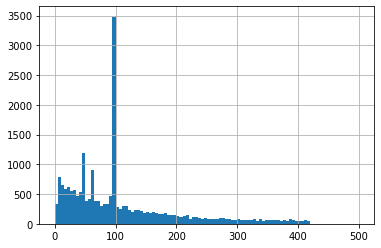

In [73]:
current_days_exposition_date['days_exposition'].hist(bins=100,range=(0,500))

Убрал выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3. Всего наблюдается 4 пика. Самый большой пик- 95 дней, есть еще пики 50 дней, 70 дней и 10 дней. Не могу сказать, что это артифакты, тк реально это возможно.
Большая часть выбросов лежит за диапазоном 420 дней и они стремяться к 0. Принял решение от них избавиться. 

In [74]:
current_days_exposition_date['last_price'].describe()

count    2.121500e+04
mean     6.377967e+06
std      1.078410e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      7.630000e+08
Name: last_price, dtype: float64

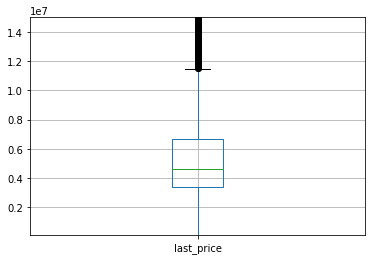

In [75]:
plt.ylim(100000,15000000)
current_days_exposition_date.boxplot(column='last_price')
plt.show()

На диаграмме размаха видно, что в выбросы попадают квартиры свыше 11 млн. руб

In [76]:
current_days_exposition_date.sort_values(by='last_price',ascending=True).head(100)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area
8793,8793,7,12190.0,109.0,2019-03-20,2,2.75,8793,32.000000,25,True,False,False,40.5,0,Санкт-Петербург,36421.000000,9176.000000,1,805.000000,0,518.043923,8,380.937500,Другой этаж,2,3,2019,0.293578,1.265625
17456,17456,7,430000.0,30.4,2019-04-22,1,2.65,17456,16.000000,1,True,False,False,6.0,0,Сланцы,28878.607504,14234.907335,0,490.830729,0,518.043923,95,26875.000000,Первый этаж,0,4,2019,0.526316,0.375000
14911,14911,5,430000.0,54.0,2018-06-26,2,2.65,14911,17.916667,3,True,False,False,9.1,0,посёлок станции Свирь,28878.607504,14234.907335,0,490.830729,0,518.043923,44,24000.000000,Другой этаж,1,6,2018,0.331790,0.507907
16274,16274,18,440000.0,40.0,2018-07-10,1,2.65,16274,29.626667,1,True,False,False,9.1,0,деревня Старополье,28878.607504,14234.907335,0,490.830729,0,518.043923,45,14851.485149,Первый этаж,1,7,2018,0.740667,0.307156
5698,5698,7,450000.0,42.0,2017-07-31,2,2.65,5698,23.000000,1,True,False,False,5.8,0,городской посёлок Будогощь,28878.607504,14234.907335,0,490.830729,0,518.043923,233,19565.217391,Первый этаж,0,7,2017,0.547619,0.252174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,13646,8,770000.0,45.0,2018-03-28,2,2.50,13646,29.000000,2,True,False,False,7.0,0,Сланцы,28878.607504,14234.907335,0,490.830729,0,518.043923,211,26551.724138,Другой этаж,2,3,2018,0.644444,0.241379
18985,18985,20,770000.0,32.0,2018-07-05,1,2.65,18985,18.000000,2,True,False,False,8.0,0,Сланцы,28878.607504,14234.907335,0,490.830729,0,518.043923,54,42777.777778,Другой этаж,3,7,2018,0.562500,0.444444
2209,2209,12,770000.0,33.0,2016-06-29,1,2.50,2209,17.000000,5,False,False,False,6.5,1,Сланцы,28878.607504,14234.907335,0,490.830729,0,518.043923,45,45294.117647,Другой этаж,2,6,2016,0.515152,0.382353
7442,7442,7,777000.0,44.0,2019-01-01,2,2.50,7442,30.000000,2,True,False,False,8.0,1,деревня Ялгино,28878.607504,14234.907335,0,490.830729,0,518.043923,45,25900.000000,Другой этаж,1,1,2019,0.681818,0.266667


Смотрю самую дорогую квартиру. Данные правдивые. Такие квартиры существуют. Так как их единицы, то думаю, что можно убрать значения начиная с 1.5 межквартального интервала+Q3= 11*10^6, правее все стремится к нулю. Также кажутся неправильными значения меньшие 1500000 за квартиру. Тоже уберу.

In [77]:
current_days_exposition_date=current_days_exposition_date.query('1500000<last_price<11*10**6') # Убрал выбросы квартир свыше 11 млн. руб

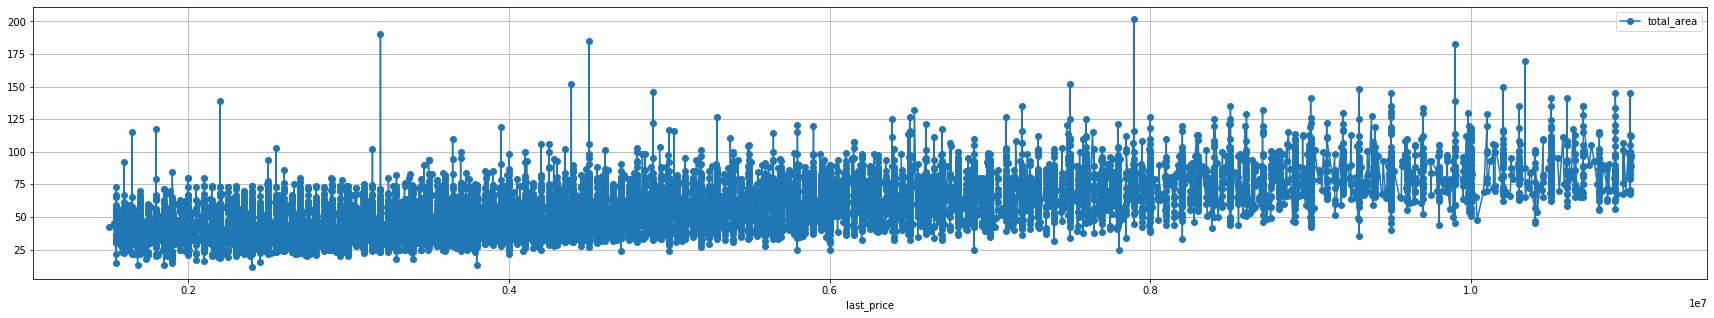

In [78]:
(current_days_exposition_date
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5))
)


In [79]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date['total_area'])

0.6867904217566922

При увеличении площади, увеличивается стоимость квартиры. Стоимость квартиры коррелирует с площадью на коэфф Пирсона 0.68. Значит сильно зависят эти величины друг от друга. Положительная корреляция 

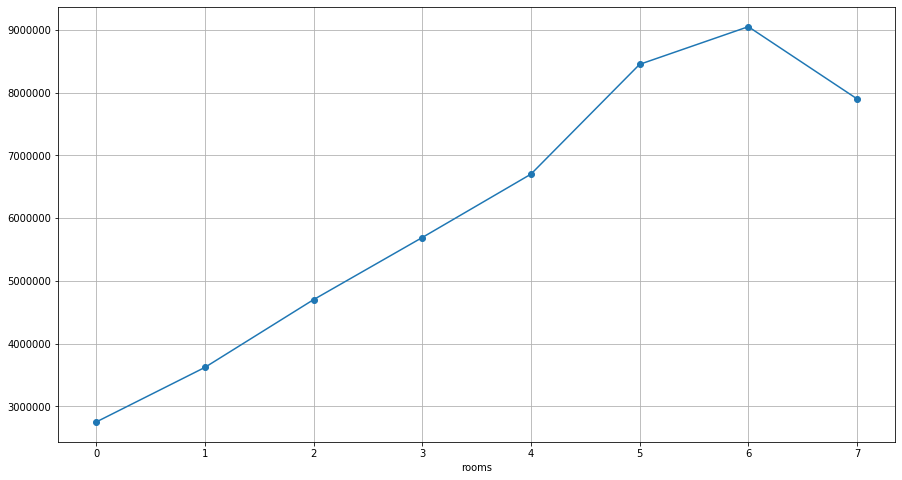

In [80]:
(current_days_exposition_date
     .groupby('rooms')['last_price'].median()
    # .sort_values(by='rooms',ascending=True)
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

На этом графике видно, что при увеливении кол-ва комнат, увеличивается стоимость. С кол-вом комнат 7, она ниже, так- как мало данных и значение медианной цены вносит свою корректировку. 

In [81]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date["rooms"])

0.4498929902274057

Коэф Пирсона 0.45. Положительная корреляция цены и кол-ва комнат

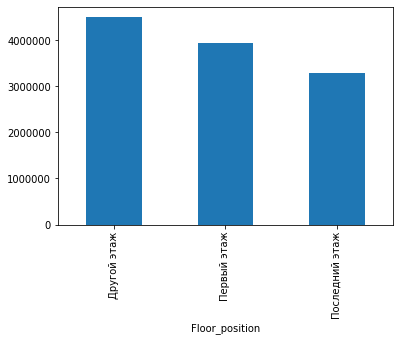

In [82]:
(current_days_exposition_date
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',kind='bar')
)


In [83]:
current_days_exposition_date['floor'].corr(current_days_exposition_date['last_price'])

0.11252527565891492

Из гистограммы видно, что цена не сильно зависит от этажа. Видно, что цена за первый этаж немного ниже. Эти выводы подтверждает коэф Пирсона= 0.11 положительный 

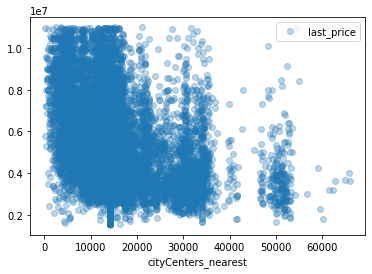

In [84]:
(current_days_exposition_date
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

In [85]:
current_days_exposition_date['cityCenters_nearest'].corr(current_days_exposition_date['last_price'])

-0.25785112335754623

Очень большой разброс, но можно увидеть плотности, которые показывают, что при увеличении расстояния, стоимость уменьшается не сильно. Об этом говорить и коэф Пирсона. Он положительный=0,26

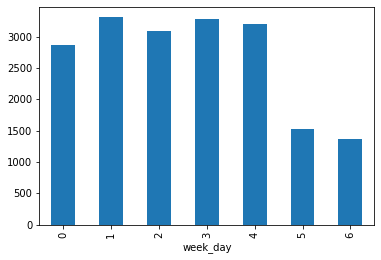

In [86]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',kind='bar')
)

По гистограмме видно, что чаще всего объявления закрываются во вторник, четверг и пятницу. В выходные меньше всего. т.к выходные! 

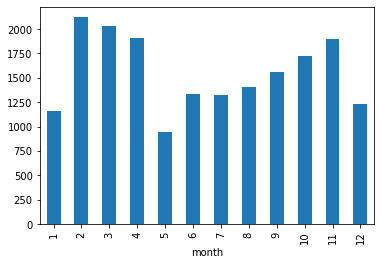

In [87]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

Из гистограммы видно, что объявления меньше всего закрываются в месяцы перед НГ в декабре и после НГ в январе. Много выходных и люди тратят деньги на подарки и отдых. В мае низко тоже из-зи праздников. 

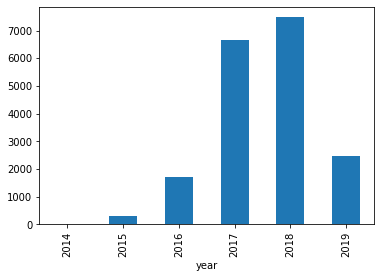

In [88]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

Больше всего продаж в 2017 и 2018 году. 

In [90]:
#raiting_of_location=current_days_exposition_date.groupby('locality_name')['price_for_m2'].count()
raiting_of_location=current_days_exposition_date.pivot_table(index='locality_name',values='price_for_m2',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)


,count,median
locality_name,,
Санкт-Петербург,12174,187910.624401
посёлок Мурино,479,177389.637355
посёлок Шушары,404,150424.203462
Всеволожск,347,128571.428571
Колпино,314,126794.871795
Пушкин,305,183510.638298
посёлок Парголово,299,200718.185634
Гатчина,266,119500.000000
деревня Кудрово,262,188187.004886


Топ 10 регионов с самым большом количеством объявлений и их средней стоимостью 1 м кв

В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 м кв

В Выборге меньше всего объявлений и самая низкая стоимость 1 м кв

In [121]:
current_days_exposition_date['cityCenters_nearest_in_km']=current_days_exposition_date['cityCenters_nearest']/1000

добавил в основную таблицу столбец с расстоянием до центра в км

In [122]:
current_days_exposition_date['cost_of_km']=current_days_exposition_date['last_price']/current_days_exposition_date['cityCenters_nearest_in_km']

Посчитал стоимость 1 кв м для всех объектом и записал в таблицу.

In [104]:
spb_region=current_days_exposition_date.query('locality_name=="Санкт-Петербург"')
spb_region.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area,cityCenters_nearest_in_km,cost_of_km
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,4,32.00000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018,0.320000,1.281250,8.098,1.234873e+06
7,7,5,7915000.0,71.6,2019-04-18,2,2.65,7,36.80599,22,True,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,490.830729,0,518.043923,95,215046.515335,Другой этаж,3,4,2019,0.514050,0.513503,11.634,6.803335e+05
9,9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.60000,7,True,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,490.830729,0,518.043923,289,123853.211009,Другой этаж,6,2,2017,0.714754,0.149083,15.008,3.598081e+05
10,10,5,5050000.0,39.6,2017-11-16,1,2.67,10,20.30000,3,True,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.000000,2,553.000000,137,248768.472906,Другой этаж,3,11,2017,0.512626,0.418719,13.878,3.638853e+05
15,15,16,4650000.0,39.0,2017-11-18,1,2.65,15,20.50000,5,True,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.000000,1,296.000000,19,226829.268293,Другой этаж,5,11,2017,0.525641,0.370732,14.259,3.261098e+05


Сделал срез по региону Санкт-Петербург

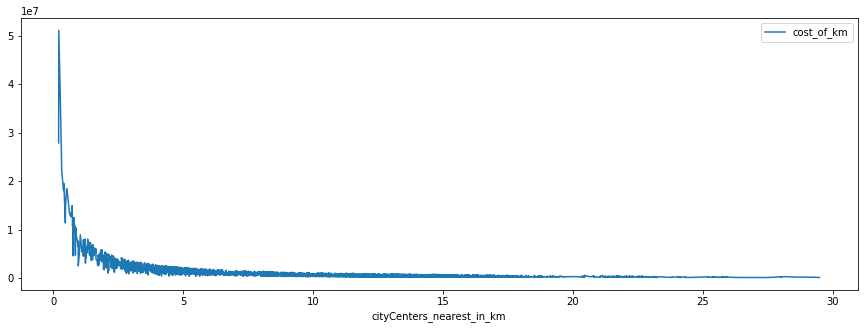

In [105]:
(spb_region
     .sort_values(by='cityCenters_nearest_in_km',ascending=True)
     .plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,5))
)

График зависимости цены 1 м кв от расстояния в регионе Спб. По нему видно, что после 5 км от центра цена почти не меняется и идет плотной линией.

In [106]:
spb_region=spb_region.query('cityCenters_nearest_in_km<5')

In [107]:
len(spb_region)

1005

Квартиры в центра

In [108]:
spb_region.sort_values(by='cost_of_km',ascending=False).head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area,cityCenters_nearest_in_km,cost_of_km
8614,8614,7,10990000.0,100.0,2015-12-16,3,3.90,8614,37.800000,3,True,False,False,11.6,0,Санкт-Петербург,21818.0,215.0,3,229.0,2,511.0,265,290740.740741,Другой этаж,2,12,2015,0.378000,0.306878,0.215,5.111628e+07
1934,1934,18,9590000.0,108.0,2017-05-23,2,3.30,1934,59.000000,2,False,False,False,11.0,0,Санкт-Петербург,21908.0,287.0,3,359.0,3,290.0,69,162542.372881,Другой этаж,1,5,2017,0.546296,0.186441,0.287,3.341463e+07
1182,1182,1,5800000.0,33.6,2016-03-10,1,3.70,1182,22.800000,4,False,False,False,6.6,0,Санкт-Петербург,21632.0,208.0,3,304.0,3,503.0,167,254385.964912,Другой этаж,3,3,2016,0.678571,0.289474,0.208,2.788462e+07
22036,22036,3,7200000.0,72.0,2017-12-21,2,3.07,22036,44.900000,2,True,False,False,12.3,0,Санкт-Петербург,21875.0,329.0,3,426.0,3,273.0,89,160356.347439,Другой этаж,3,12,2017,0.623611,0.273942,0.329,2.188450e+07
9488,9488,3,8000000.0,106.0,2018-07-26,3,3.40,9488,37.201254,1,True,False,False,9.1,0,Санкт-Петербург,21653.0,410.0,3,591.0,2,38.0,60,215046.515335,Первый этаж,3,7,2018,0.350955,0.244615,0.410,1.951220e+07


Вывел самые высокие стоимости за м кв квартиры в центре региона Спб

In [109]:
top=current_days_exposition_date.query('cityCenters_nearest_in_km<5 and locality_name=="Санкт-Петербург"')

In [110]:
top.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area,cityCenters_nearest_in_km,cost_of_km
24,24,8,6500000.0,97.2,2015-10-31,2,2.65,24,46.5,1,True,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.000000,3,124.000000,265,139784.946237,Первый этаж,5,10,2015,0.478395,0.421505,2.336,2.782534e+06
99,99,32,9600000.0,90.0,2017-09-26,4,2.65,99,67.0,2,True,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0,490.830729,0,518.043923,104,143283.582090,Другой этаж,1,9,2017,0.744444,0.119403,2.818,3.406671e+06
136,136,16,6500000.0,51.8,2018-08-01,2,3.45,136,25.6,2,True,False,False,7.3,1,Санкт-Петербург,20502.0,3618.0,2,533.000000,1,812.000000,163,253906.250000,Другой этаж,2,8,2018,0.494208,0.285156,3.618,1.796573e+06
138,138,8,4800000.0,40.0,2017-11-18,2,2.65,138,29.0,2,True,False,False,6.0,0,Санкт-Петербург,23371.0,2913.0,0,490.830729,2,729.000000,80,165517.241379,Другой этаж,5,11,2017,0.725000,0.206897,2.913,1.647786e+06
154,154,1,8200000.0,80.0,2018-11-06,3,4.15,154,44.2,2,True,False,False,12.2,0,Санкт-Петербург,20562.0,3167.0,2,344.000000,1,838.000000,38,185520.361991,Другой этаж,1,11,2018,0.552500,0.276018,3.167,2.589201e+06


изчаем квартиры в центре в спб.

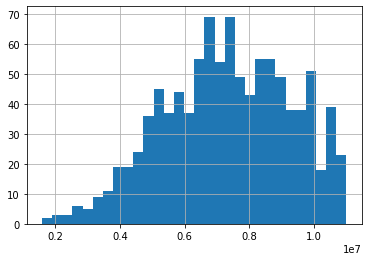

In [111]:
top['last_price'].hist(bins=30)

В центральном районе больше всего квартир за 7 млн руб

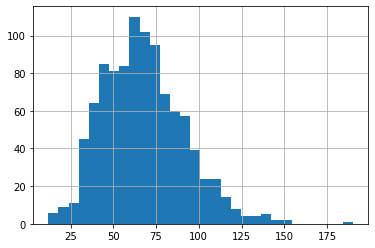

In [112]:
top['total_area'].hist(bins=30)

В центральном районе большая часть квартир в районе 60 м кв

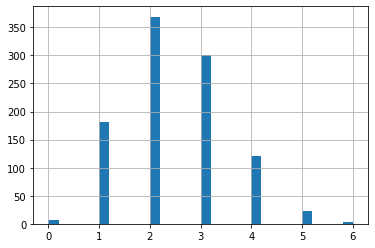

In [113]:
top['rooms'].hist(bins=30)

В центральном районе больше всего продается 2 квартиры

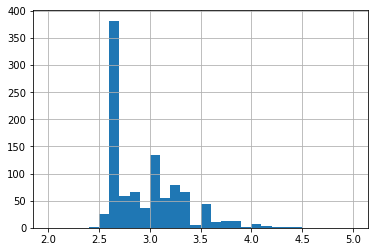

In [114]:
top['ceiling_height'].hist(bins=30,range=(2,5))

В центральном районе больше всего продается квартир с высотой потолка 2,6 м 

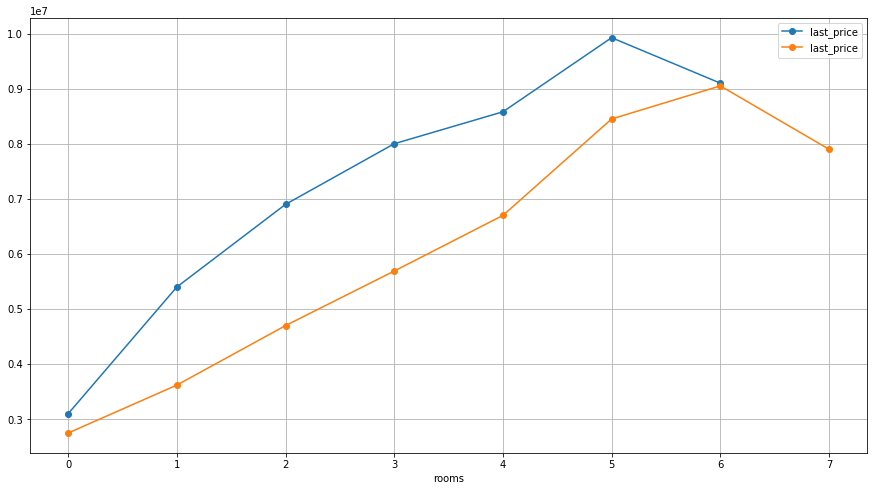

In [115]:
(top
     .sort_values(by='last_price',ascending=True)
     #.pivot_table(index='last_price_x',values='rooms_x')
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)


(current_days_exposition_date
     .groupby('rooms')['last_price'].median()
    # .sort_values(by='rooms',ascending=True)
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)
plt.show()

На графике видно, что с увеличением комнат увеличивается стоимость. График квартир в центре сдвинут вверх отностительно всех квартир, тк в центре квартиры дороже. Самые дорогие 5 комнатные квартиры

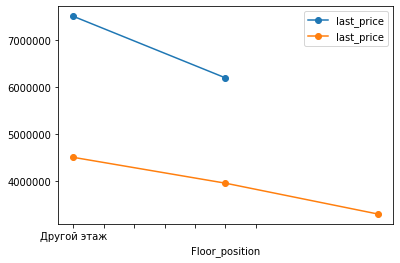

In [116]:
(top
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',style='o-',legend=True)
)


(current_days_exposition_date
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',style='o-',legend=True)
)

plt.show()

Видно, что квартиры на последнем этаже покупают охотнее. На первом этаже покупают реже всего. В центральном районе они дороже

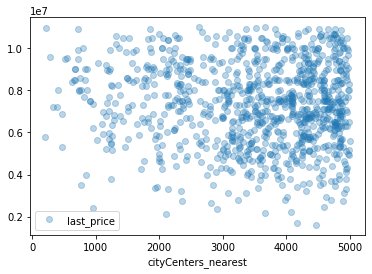

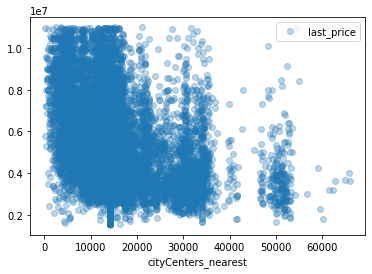

In [117]:
(top
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

(current_days_exposition_date
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

plt.show()

По верхней гистограмме видно, что больше всего квартир на расстоянии 4-5км и стоят они от 6-8 млн. руб

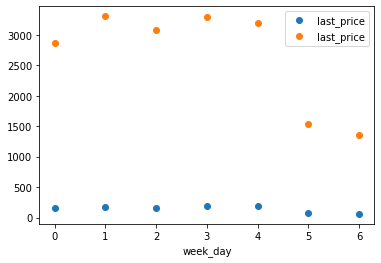

In [118]:
(top
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

plt.show()



В течении недели квартиры продаются примерно одинаково. в субб и в воскр сильно меньше.

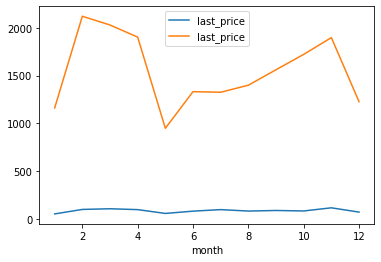

In [119]:

(top
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)

plt.show()

В течении года квартиры в центре продаются примерно одинаково.

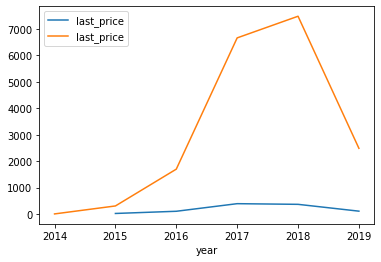

In [120]:
(top
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)

plt.show()

По графику можно сказать, что в 2018 году был подъем продаж. В целом квартиры c центре не сделали основные продажи в тот год.

### Шаг 5. Общий вывод

Если обобщить все данные, то можно сделать вывод, что больше всего квартир продается в будние дни,1-3 комнатные квартиры, на любом, кроме первого этажа, с высотой потолка 2,6 м за цену около 4,5 млн. руб.
Увидели, что цена кв. зависет от этажа, района, от высоты потолка и от кол-ва комнат. 
Корреляция этих параметров в центре похоже и для всех квартир.